#Practica 6:
# Simular las Llegadas de clientes y tiempos de servicio

##Método de la Transformada Inversa:

Este método genera variables aleatorias de una distribución específica, transformando números uniformes (0,1) en variables deseadas.

##Ejemplo en una Tienda Departamental de Electrónicos:

En este escenario, utilizamos el método de la transformada inversa para modelar dos situaciones:

Llegadas de clientes (Distribución Poisson):

Contexto: Los clientes llegan aleatoriamente a una tienda de electrónicos, con un promedio de 10 clientes por hora.

Modelo: La distribución Poisson modela estas llegadas, adecuada para eventos aleatorios e independientes con una tasa constante.

Fórmula: La probabilidad de
𝑘
 llegadas se calcula usando la fórmula de Poisson.

Tiempo de servicio (Distribución Exponencial):

Contexto: El tiempo de atención a cada cliente en la tienda es aleatorio, con un promedio de 15 minutos por cliente.

Modelo: La distribución exponencial se usa para modelar los tiempos entre eventos, adecuada para tiempos de servicio aleatorios con una tasa constante de ocurrencia.

Fórmula: La función de densidad de probabilidad (PDF) se utiliza para calcular estos tiempos.

Aplicación del Método de la Transformada Inversa:

Llegadas de clientes (Poisson):

Generar un número aleatorio
𝑈
 uniforme.

Calcular la función de distribución acumulada (FDA) de Poisson.

Encontrar el menor valor de
𝑘
 tal que
𝐹
(
𝑘
)
≥
𝑈
.

Tiempo de servicio (Exponencial):

Generar un número aleatorio
𝑈
 uniforme.

Aplicar la fórmula inversa:
𝑡
=
−
1
𝜆
ln
⁡
(
1
−
𝑈
)
 para obtener el tiempo de servicio.

#Ejemplo en Python:

El siguiente código combina ambas distribuciones para simular las llegadas de clientes y los tiempos de servicio, permitiendo a la tienda optimizar su personal y minimizar tiempos de espera:

<ipython-input-1-4c51d4b5d0f5>:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (l ** k) * np.exp(-l) / np.math.factorial(k)


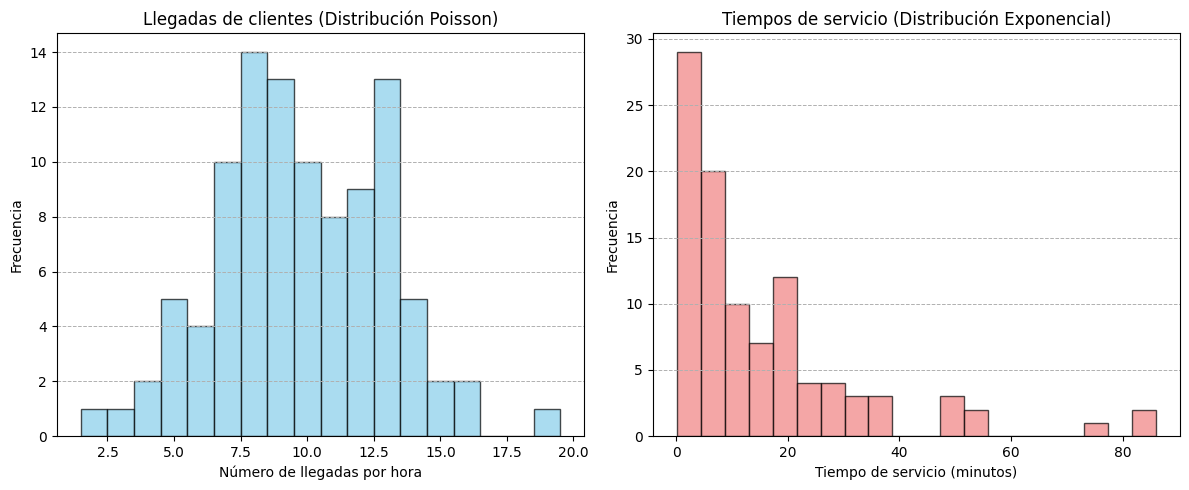

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb


n = 10
p = 0.30
lambda_poisson = 10
lambda_exponencial = 1 / 15

num_simulaciones = 100

def poisson_pmf(l, k):
    return (l ** k) * np.exp(-l) / np.math.factorial(k)

def poisson_inverse_transform(l, U):
    F_k = 0
    k = 0
    while True:
        F_k += poisson_pmf(l, k)
        if U <= F_k:
            return k
        k += 1

def exponencial_inverse_transform(lambda_exponencial, U):
    return -np.log(1 - U) / lambda_exponencial

U_poisson = np.random.uniform(0, 1, num_simulaciones)
U_exponencial = np.random.uniform(0, 1, num_simulaciones)

llegadas = [poisson_inverse_transform(lambda_poisson, u) for u in U_poisson]
tiempos_servicio = [exponencial_inverse_transform(lambda_exponencial, u) for u in U_exponencial]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(llegadas, bins=np.arange(min(llegadas), max(llegadas) + 2) - 0.5, edgecolor='black', color='skyblue', alpha=0.7)
plt.title("Llegadas de clientes (Distribución Poisson)")
plt.xlabel("Número de llegadas por hora")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.subplot(1, 2, 2)
plt.hist(tiempos_servicio, bins=20, edgecolor='black', color='lightcoral', alpha=0.7)
plt.title("Tiempos de servicio (Distribución Exponencial)")
plt.xlabel("Tiempo de servicio (minutos)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


#Conclusion
En conclusión, el método de la transformada inversa es una técnica poderosa para generar variables aleatorias a partir de una distribución específica, transformando números uniformes en las variables deseadas. En el contexto de una tienda departamental de electrónicos, este método se aplica eficazmente para modelar las llegadas de clientes y los tiempos de servicio.

Para las llegadas de clientes, se utiliza la distribución de Poisson, adecuada para eventos aleatorios e independientes con una tasa constante, como un promedio de 10 clientes por hora. La probabilidad de un número específico de llegadas se calcula con la fórmula de Poisson.